# Used SMOTE to balance the dataset

In [1]:
import pandas as pd
# !pip install --force-reinstall scipy

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# !pip install imbalanced-learn
# !pip install xgboost
# !pip install lightgbm






In [2]:
malnutrition = pd.read_csv('Malnutrition data.csv')

In [3]:
df = malnutrition

In [4]:
# List of columns to be removed
columns_to_remove = ["Low Income", "Lower Middle Income", "Upper Middle Income"]

# Creating a new DataFrame with the specified columns removed
df_filtered = df.drop(columns=columns_to_remove, axis=1)

print(df_filtered.head())

   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_filtered.drop("Status", axis=1) 
y = df_filtered["Status"]

smote = SMOTE(k_neighbors=3,random_state=42)

# Applying SMOTE to the whole dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Status")], axis=1)

print(df_resampled.head())


   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [6]:
# Save the resampled dataset to a CSV file
df_resampled.to_csv("resampled_data.csv", index=False)
print("The resampled dataset has been saved to 'resampled_data.csv'.")


The resampled dataset has been saved to 'resampled_data.csv'.


In [7]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the entire DataFrame
df_resampled

,Sex,Age,Height,Weight,Status
0,1,5,75,17,Stunting
1,0,4,101,13,Stunting
2,0,4,71,17,Stunting
3,0,3,81,13,Stunting
4,0,1,79,16,Stunting
5,1,2,81,12,Stunting
6,1,1,88,9,Overweight
7,0,2,86,15,Stunting
8,0,1,107,13,Stunting
9,0,3,103,17,Stunting


In [8]:
# Printing the number of samples after applying SMOTE
print("\nNumber of samples after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Displaying the resulting DataFrame
print("\nResampled DataFrame:")
print(df_resampled.head())


Number of samples after SMOTE:
Status
Stunting       696
Overweight     696
Underweight    696
Wasting        696
Name: count, dtype: int64

Resampled DataFrame:
   Sex  Age  Height  Weight    Status
0    1    5      75      17  Stunting
1    0    4     101      13  Stunting
2    0    4      71      17  Stunting
3    0    3      81      13  Stunting
4    0    1      79      16  Stunting


In [9]:
# Checking for outliers in the dataset

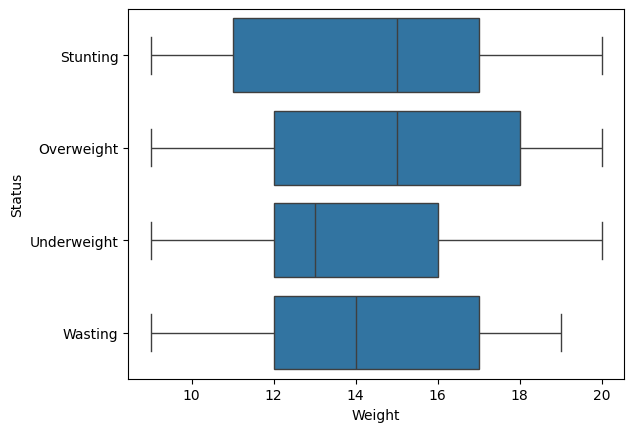

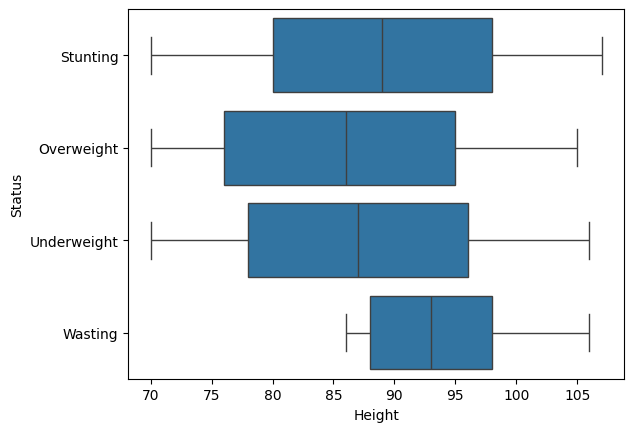

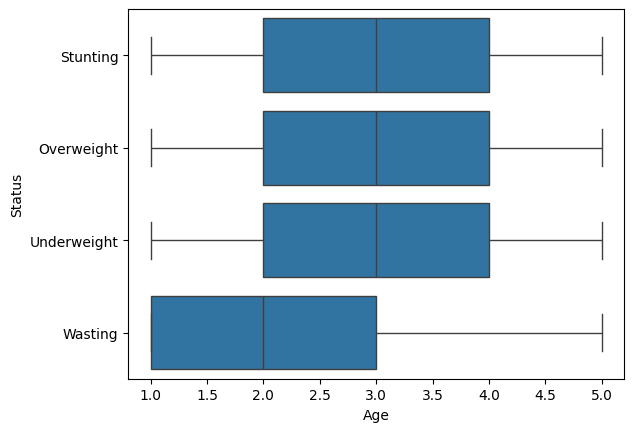

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x='Weight', y='Status', data=df_resampled)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x='Height', y='Status', data=df_resampled)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.boxplot(x='Age', y='Status', data=df_resampled)
plt.show()


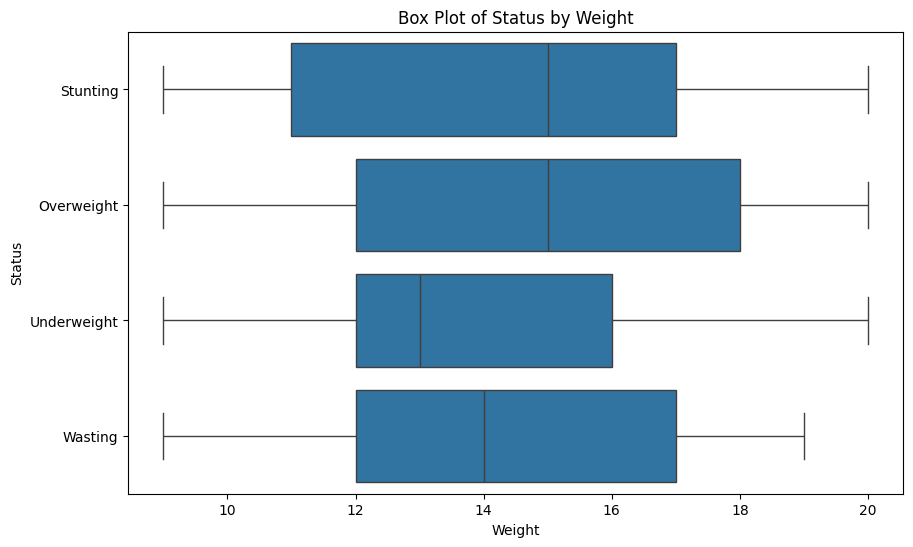

Lower Bound: 4.5
Upper Bound: 24.5
Outliers detected:
 Empty DataFrame
Columns: [Sex, Age, Height, Weight, Status]
Index: []


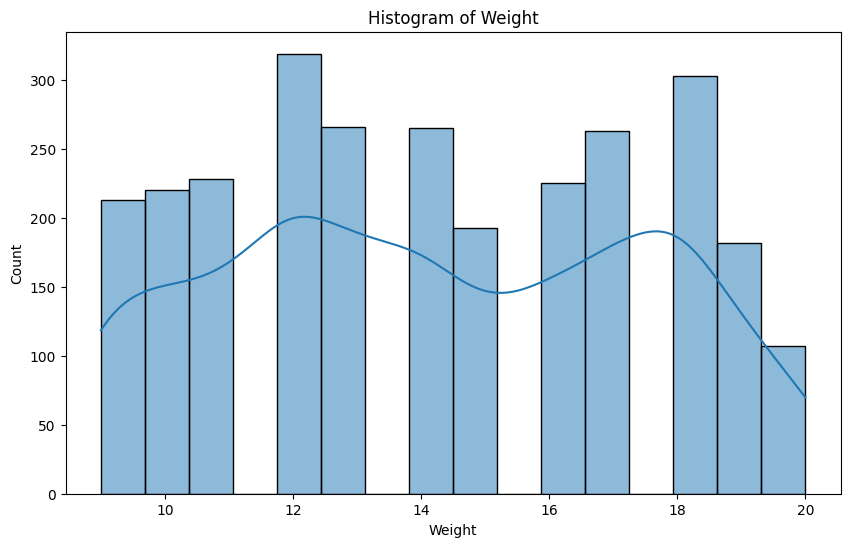

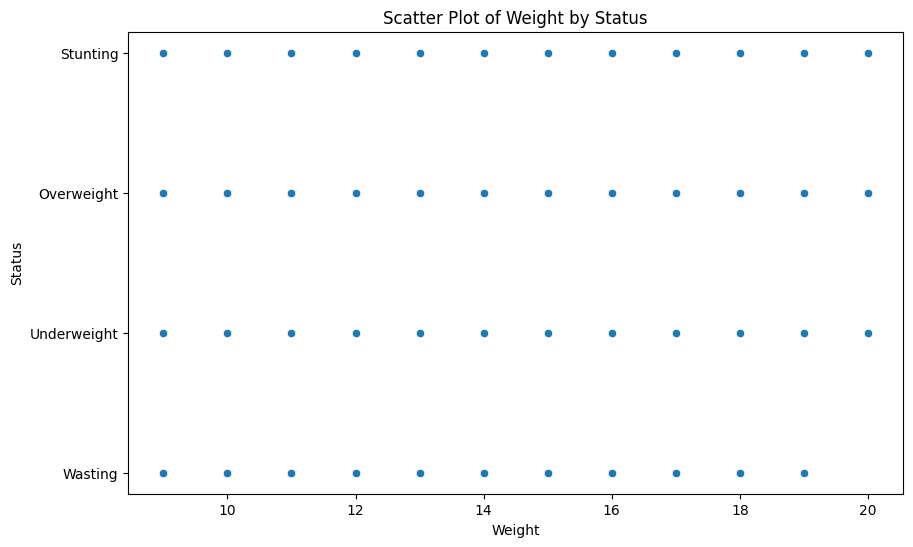

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weight', y='Status', data=df_resampled)
plt.title('Box Plot of Status by Weight')
plt.show()

# Check for outliers using IQR method
Q1 = df_resampled['Weight'].quantile(0.25)
Q3 = df_resampled['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df_resampled[(df_resampled['Weight'] < lower_bound) | (df_resampled['Weight'] > upper_bound)]
print("Outliers detected:\n", outliers)

# Additional visualization - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_resampled['Weight'], kde=True)
plt.title('Histogram of Weight')
plt.show()

# Additional visualization - Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Status', data=df_resampled)
plt.title('Scatter Plot of Weight by Status')
plt.show()


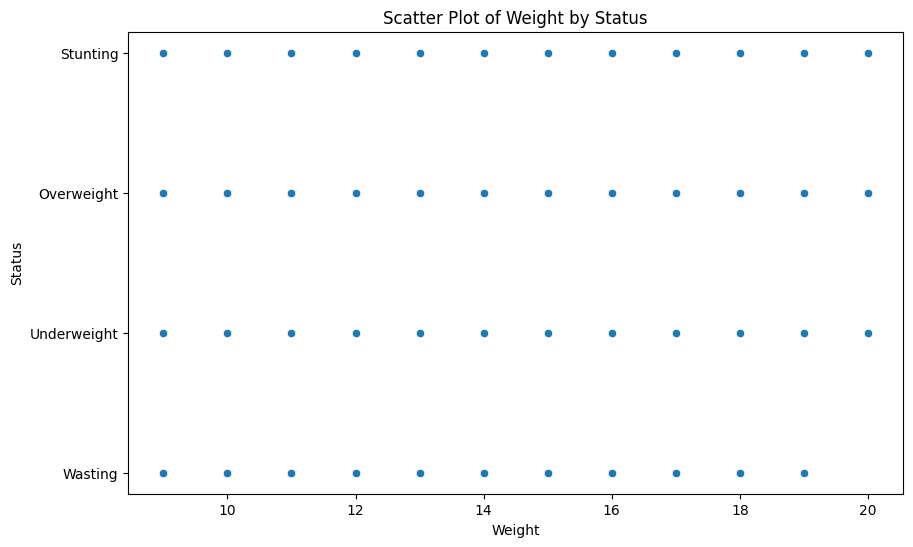

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_resampled is your DataFrame
# Scatter plot to visualize the relationship between 'Weight' and 'Status'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Status', data=df_resampled)
plt.title('Scatter Plot of Weight by Status')
plt.xlabel('Weight')
plt.ylabel('Status')
plt.show()


In [70]:
print(df_resampled.columns)


Index(['Sex', 'Age', 'Height', 'Weight', 'Status'], dtype='object')


In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y) from the resampled DataFrame
X_resampled = df_resampled.drop("Status", axis=1)
y_resampled = df_resampled["Status"]

# Split the resampled data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Split the temp data into validation (50% of temp, or 15% of the original) and testing (50% of temp, or 15% of the original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the number of samples in each set
print("\nNumber of samples in the training set:")
print(y_train.value_counts())

print("\nNumber of samples in the validation set:")
print(y_val.value_counts())

print("\nNumber of samples in the testing set:")
print(y_test.value_counts())



Number of samples in the training set:
Status
Wasting        498
Overweight     493
Underweight    479
Stunting       478
Name: count, dtype: int64

Number of samples in the validation set:
Status
Overweight     110
Wasting        106
Underweight    104
Stunting        98
Name: count, dtype: int64

Number of samples in the testing set:
Status
Stunting       120
Underweight    113
Overweight      93
Wasting         92
Name: count, dtype: int64


In [12]:
# print(X_train.value_counts())



In [13]:
X_train.to_csv("Xtrain.csv", index=False)
print("The resampled dataset has been saved to 'Xtrain.csv'.")

The resampled dataset has been saved to 'Xtrain.csv'.


In [14]:
import pandas as pd

# Assuming your training data is in a pandas DataFrame called X_train
missing_values = X_train.isnull().sum()

# Print the count of missing values in each column
print(missing_values)

# Print a summary of the total number of missing values
total_missing = missing_values.sum()
print("\nTotal number of missing values:", total_missing)

# Print columns with missing values
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Sex       0
Age       0
Height    0
Weight    0
dtype: int64

Total number of missing values: 0

Columns with missing values:
Series([], dtype: int64)


In [15]:
# Using the resampled dataset to generate,
# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))



Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

  Overweight       0.82      0.78      0.80       110
    Stunting       0.78      0.58      0.67        98
 Underweight       0.77      0.94      0.85       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

  Overweight       0.77      0.84      0.80        93
    Stunting       0.88      0.68      0.77       120
 Underweight       0.84      0.94      0.89       113
     Wasting       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.86      0.85      0.85       418



In [17]:
# RF with cofusion matrix 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()



Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

  Overweight       0.82      0.78      0.80       110
    Stunting       0.78      0.58      0.67        98
 Underweight       0.77      0.94      0.85       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Confusion Matrix - Validation Set:
[[ 86  13  10   1]
 [ 16  57  19   6]
 [  3   3  98   0]
 [  0   0   0 106]]

Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

  Overweight       0.77      0.84      0.80        93
    Stunting       0.88      0.68      0.77       120
 Underweight       0.84      0.94      0.89       113
     Wasting       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted a

# RFC with label encoding 


Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       110
           1       0.78      0.58      0.67        98
           2       0.77      0.94      0.85       104
           3       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Confusion Matrix - Validation Set:
[[ 86  13  10   1]
 [ 16  57  19   6]
 [  3   3  98   0]
 [  0   0   0 106]]

Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        93
           1       0.88      0.68      0.77       120
           2       0.84      0.94      0.89       113
           3       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted a

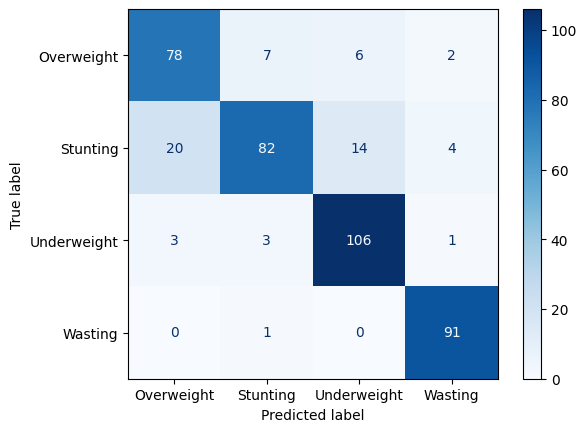

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assume X_train, y_train, X_val, y_val, X_test, y_test are defined

# Encode categorical labels as numeric labels
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform training, validation, and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val_encoded, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val_encoded, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val_encoded, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test_encoded, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [20]:
# RF with grid search

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Train the classifier on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the best model found by GridSearchCV on the validation set
y_val_pred = grid_search.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Evaluate the best model found by GridSearchCV on the test set
y_test_pred = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Validation Set:
Accuracy: 83.73%
              precision    recall  f1-score   support

  Overweight       0.81      0.81      0.81       110
    Stunting       0.79      0.58      0.67        98
 Underweight       0.80      0.94      0.86       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.83      0.84      0.83       418


Confusion Matrix - Validation Set:
[[ 89  13   7   1]
 [ 17  57  18   6]
 [  4   2  98   0]
 [  0   0   0 106]]

Test Set:
Accuracy: 84.69%
              precision    recall  f1-score   support

  Overweight       0.76      0.86      0.81        93
    Stunting       0.88      0.65      0.75       120
 Underweight       0.83      0.94

In [22]:
# RF using random search 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],  # Add more values for a better search
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Train the classifier on the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the best model found by RandomizedSearchCV on the validation set
y_val_pred = random_search.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Evaluate the best model found by RandomizedSearchCV on the test set
y_test_pred = random_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

Validation Set:
Accuracy: 83.73%
              precision    recall  f1-score   support

  Overweight       0.81      0.81      0.81       110
    Stunting       0.79      0.58      0.67        98
 Underweight       0.80      0.94      0.86       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.83      0.84      0.83       418


Confusion Matrix - Validation Set:
[[ 89  13   7   1]
 [ 17  57  18   6]
 [  4   2  98   0]
 [  0   0   0 106]]

Test Set:
Accuracy: 84.69%
              precision    recall  f1-score   support

  Overweight       0.76      0.86      0.81        93
    Stunting       0.88      0.65      0.75       120
 Underweight       0.83      0.94   

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_val_pred_encoded = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val_encoded, y_val_pred_encoded)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val_encoded, y_val_pred_encoded))

# Make predictions on the test set
y_test_pred_encoded = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test_encoded, y_test_pred_encoded)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test_encoded, y_test_pred_encoded))



Validation Set:
Accuracy: 83.01%
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       110
           1       0.78      0.58      0.67        98
           2       0.77      0.94      0.85       104
           3       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.82       418
weighted avg       0.83      0.83      0.82       418


Test Set:
Accuracy: 85.41%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        93
           1       0.88      0.68      0.77       120
           2       0.84      0.94      0.89       113
           3       0.93      0.99      0.96        92

    accuracy                           0.85       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.86      0.85      0.85       418



In [25]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Lists to store training and validation accuracies
# train_accuracies = []
# val_accuracies = []
# num_training_samples = []

# # Vary the size of the training set
# train_sizes = np.linspace(0.1, 1.0, 10)

# for train_size in train_sizes:
#     # Determine the number of samples based on the train_size
#     num_samples = int(len(X_train) * train_size)

#     # Subset the training data
#     X_train_subset = X_train[:num_samples]
#     y_train_subset = y_train[:num_samples]

#     # Train the classifier on the subset
#     rf_classifier.fit(X_train_subset, y_train_subset)

#     # Make predictions on the validation set
#     y_val_pred = rf_classifier.predict(X_val)

#     # Evaluate the model on the training set
#     train_accuracy = accuracy_score(y_train_subset, rf_classifier.predict(X_train_subset))

#     # Evaluate the model on the validation set
#     val_accuracy = accuracy_score(y_val, y_val_pred)

#     # Store training and validation accuracies
#     train_accuracies.append(train_accuracy)
#     val_accuracies.append(val_accuracy)
#     num_training_samples.append(num_samples)

# # Plot the learning curve
# plt.plot(num_training_samples, train_accuracies, label='Training Accuracy')
# plt.plot(num_training_samples, val_accuracies, label='Validation Accuracy')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()


In [26]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# # Train the classifier on the training data
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = svm_classifier.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Make predictions on the test set
# y_test_pred = svm_classifier.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))


In [27]:
# Using SVM with Grid search.

Best Parameters: {'svc__C': 10, 'svc__gamma': 100}

Validation Set:
Accuracy: 84.21%
              precision    recall  f1-score   support

  Overweight       0.85      0.75      0.80       110
    Stunting       0.72      0.74      0.73        98
 Underweight       0.84      0.90      0.87       104
     Wasting       0.96      0.96      0.96       106

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418


Test Set:
Accuracy: 88.52%
              precision    recall  f1-score   support

  Overweight       0.88      0.82      0.85        93
    Stunting       0.82      0.86      0.84       120
 Underweight       0.89      0.89      0.89       113
     Wasting       0.96      0.98      0.97        92

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.89      0.89      0.88       418


Confusion Matrix

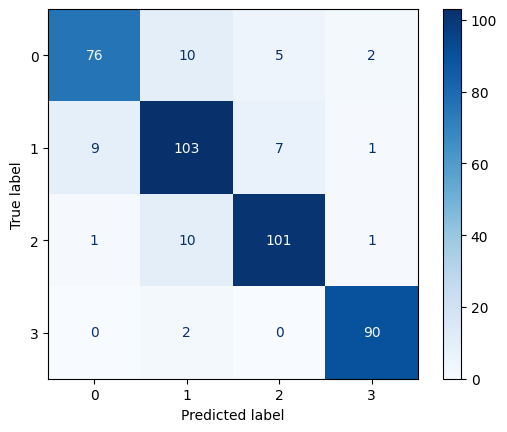

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'svc__C': [10],  # C parameter for regularization
    'svc__gamma': [0.01, 0.1, 1, 100],  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Fit the pipeline (including StandardScaler) with training data
svm_classifier.fit(X_train, y_train)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [29]:
#  SVM with confusion matrix  choose this for now

Best Parameters: {'svc__C': 10, 'svc__gamma': 100}

Validation Set:
Accuracy: 84.21%
              precision    recall  f1-score   support

  Overweight       0.85      0.75      0.80       110
    Stunting       0.72      0.74      0.73        98
 Underweight       0.84      0.90      0.87       104
     Wasting       0.96      0.96      0.96       106

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418


Test Set:
Accuracy: 88.52%
              precision    recall  f1-score   support

  Overweight       0.88      0.82      0.85        93
    Stunting       0.82      0.86      0.84       120
 Underweight       0.89      0.89      0.89       113
     Wasting       0.96      0.98      0.97        92

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.89      0.89      0.88       418


Confusion Matrix

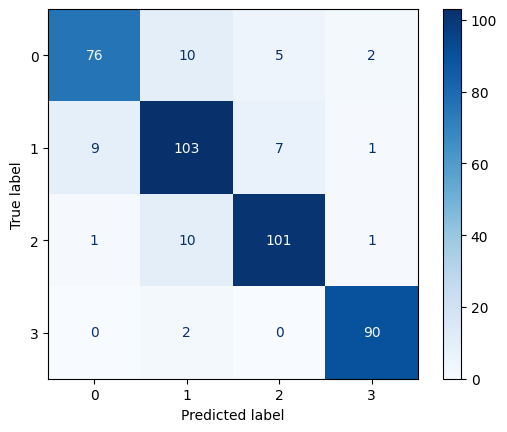

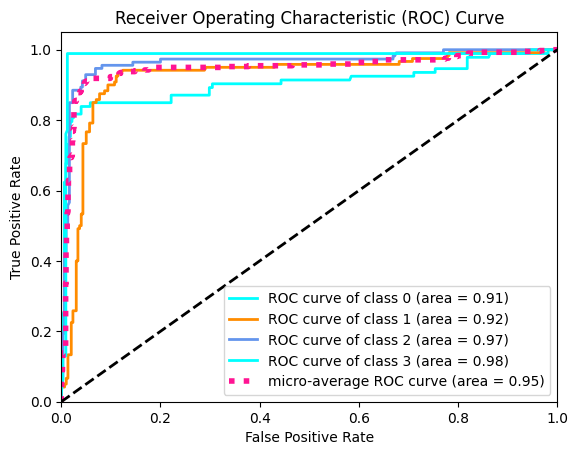

In [30]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import numpy as np

# Define the parameter grid
param_grid = {
    'svc__C': [10, 100],  
    'svc__gamma': [0.01, 0.1, 1, 10, 100, 150],  
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Use the best estimator from the grid search
classifier = OneVsRestClassifier(grid_search.best_estimator_)

# Compute ROC curve and ROC area for each class
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()







Best Parameters: {'svc__C': 10, 'svc__gamma': 100}

Validation Set:
Accuracy: 84.21%
              precision    recall  f1-score   support

  Overweight       0.85      0.75      0.80       110
    Stunting       0.72      0.74      0.73        98
 Underweight       0.84      0.90      0.87       104
     Wasting       0.96      0.96      0.96       106

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418


Confusion Matrix - Validation Set:
[[ 83  19   7   1]
 [ 12  73  10   3]
 [  3   7  94   0]
 [  0   3   1 102]]

Test Set:
Accuracy: 88.52%
              precision    recall  f1-score   support

  Overweight       0.88      0.82      0.85        93
    Stunting       0.82      0.86      0.84       120
 Underweight       0.89      0.89      0.89       113
     Wasting       0.96      0.98      0.97        92

    accuracy                           0.89       418
   macro avg 

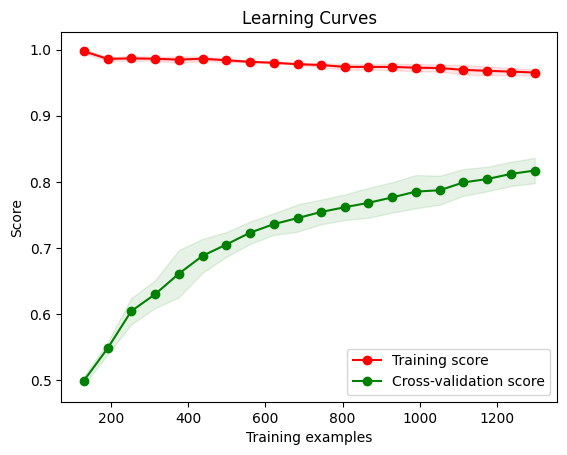

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
    'svc__gamma': [0.01, 0.1, 1, 100],  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Fit the pipeline (including StandardScaler) with training data
svm_classifier.fit(X_train, y_train)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Specify more granular and larger range for train_sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # 20 evenly spaced intervals from 10% to 100% of the training data

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=-1, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title('Learning Curves')
plt.show()




In [32]:
# Using other parameters for SVM

In [33]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# # Define the parameter grid
# param_grid = {
#     'svc__C': [0.1, 10, 100],  # C parameter for regularization
#     'svc__kernel': ['poly'],  # Kernel options
#     'svc__gamma': [0.01, 0.1, 1, 10],  # Gamma parameter for 'rbf', 'poly', and 'sigmoid' kernels
#     'svc__degree': [2, 3, 4]  # Degree parameter for 'poly' kernel
# }

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(random_state=42))

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# # Train the classifier using grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the validation set using the best model
# y_val_pred = grid_search.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Compute the confusion matrix for the validation set
# conf_matrix_val = confusion_matrix(y_val, y_val_pred)
# print("\nConfusion Matrix - Validation Set:")
# print(conf_matrix_val)

# # Make predictions on the test set using the best model
# y_test_pred = grid_search.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))

# # Compute the confusion matrix for the test set
# conf_matrix_test = confusion_matrix(y_test, y_test_pred)
# print("\nConfusion Matrix - Test Set:")
# print(conf_matrix_test)


In [34]:
# using only the poly kernel for svm 

In [35]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# # Define the parameter grid
# param_grid = {
#     'svc__C': [0.1, 10, 100],  # C parameter for regularization
#     'svc__kernel': ['poly'],  # Kernel option, changed to 'poly'
#     'svc__degree': [2, 3, 4],  # Degree parameter for 'poly' kernel
#     'svc__gamma': [0.01, 0.1, 1, 10],  # Gamma parameter for 'poly' kernel
# }

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(random_state=42))

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# # Train the classifier using grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the validation set using the best model
# y_val_pred = grid_search.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Compute the confusion matrix for the validation set
# conf_matrix_val = confusion_matrix(y_val, y_val_pred)
# print("\nConfusion Matrix - Validation Set:")
# print(conf_matrix_val)

# # Make predictions on the test set using the best model
# y_test_pred = grid_search.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))

# # Compute the confusion matrix for the test set
# conf_matrix_test = confusion_matrix(y_test, y_test_pred)
# print("\nConfusion Matrix - Test Set:")
# print(conf_matrix_test)


In [36]:
# Using SVM with random search 

Best Parameters: {'svc__C': 6.218704727769076, 'svc__gamma': 5.829384542994738}

Validation Set:
Accuracy: 83.49%
              precision    recall  f1-score   support

  Overweight       0.76      0.85      0.81       110
    Stunting       0.85      0.53      0.65        98
 Underweight       0.80      0.93      0.86       104
     Wasting       0.94      1.00      0.97       106

    accuracy                           0.83       418
   macro avg       0.84      0.83      0.82       418
weighted avg       0.84      0.83      0.83       418


Confusion Matrix - Validation Set:
[[ 94   6   7   3]
 [ 25  52  17   4]
 [  4   3  97   0]
 [  0   0   0 106]]

Test Set:
Accuracy: 83.73%
              precision    recall  f1-score   support

  Overweight       0.75      0.83      0.79        93
    Stunting       0.86      0.66      0.75       120
 Underweight       0.82      0.90      0.86       113
     Wasting       0.93      1.00      0.96        92

    accuracy                          

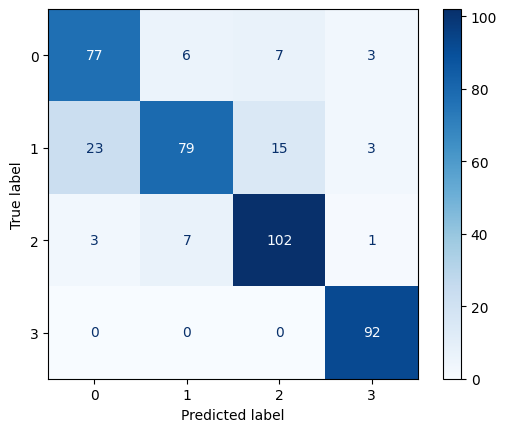

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'svc__C': reciprocal(0.1, 100),  # C parameter for regularization
    'svc__gamma': reciprocal(0.01, 10),  # gamma parameter for the RBF kernel
}

# Create an SVM Classifier with a pipeline including standard scaling
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)

# Train the classifier using random search
random_search.fit(X_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred = random_search.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set using the best model
y_test_pred = random_search.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Using XGBoost with grid search 

Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.4, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}

Validation Set:
Accuracy: 78.23%
              precision    recall  f1-score   support

  Overweight       0.75      0.73      0.74       110
    Stunting       0.79      0.50      0.61        98
 Underweight       0.75      0.90      0.82       104
     Wasting       0.84      0.98      0.90       106

    accuracy                           0.78       418
   macro avg       0.78      0.78      0.77       418
weighted avg       0.78      0.78      0.77       418


Confusion Matrix - Validation Set:
[[ 80  12   9   9]
 [ 19  49  20  10]
 [  8   1  94   1]
 [  0   0   2 104]]

Test Set:
Accuracy: 80.62%
              precision    recall  f1-score   support

  Overweight       0.75      0.83      0.79        93
    Stunting       

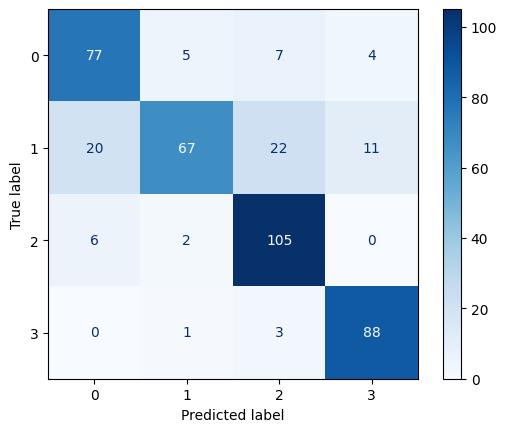

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Encode the labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for XGBoost
param_grid = {
    'xgbclassifier__n_estimators': [100],
    'xgbclassifier__max_depth': [9],
    'xgbclassifier__learning_rate': [0.1],
    'xgbclassifier__subsample': [0.8],
    'xgbclassifier__colsample_bytree': [0.8],
    'xgbclassifier__gamma': [0.4],
    'xgbclassifier__min_child_weight': [5]
}

# Create an XGBoost Classifier with a pipeline including standard scaling
xgb_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('xgbclassifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Train the classifier using grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_encoded = grid_search.predict(X_val)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set using the best model
y_test_pred_encoded = grid_search.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Using XGBoost with random search 

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_sam

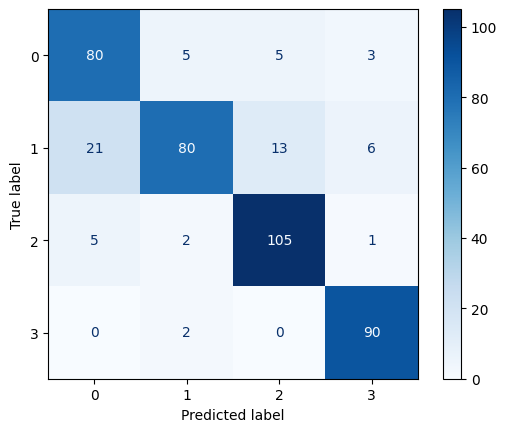

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from scipy.stats import randint, uniform

# Encode the labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'xgbclassifier__n_estimators': randint(50, 500),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__learning_rate': uniform(0.01, 0.2 - 0.01),
    'xgbclassifier__subsample': uniform(0.6, 1.0 - 0.6),
    'xgbclassifier__colsample_bytree': uniform(0.6, 1.0 - 0.6),
    'xgbclassifier__gamma': uniform(0, 0.4),
    'xgbclassifier__min_child_weight': randint(1, 6)
}

# Create an XGBoost Classifier with a pipeline including standard scaling
xgb_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('xgbclassifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, n_iter=500, cv=3, scoring='accuracy', random_state=42)

# Train the classifier using random search
random_search.fit(X_train, y_train_encoded)

# Get the best parameters from the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best model
y_val_pred_encoded = random_search.predict(X_val)
y_val_pred = label_encoder.inverse_transform(y_val_pred_encoded)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\nValidation Set:")
print(f"Accuracy: {accuracy_val:.2%}")
print(classification_report(y_val, y_val_pred))

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)

# Make predictions on the test set using the best model
y_test_pred_encoded = random_search.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTest Set:")
print(f"Accuracy: {accuracy_test:.2%}")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [40]:
# Using LightGBM

In [41]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Create a pipeline with StandardScaler and LightGBM Classifier
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('lgbmclassifier', LGBMClassifier(random_state=42))
# ])

# # Define the parameter grid for LightGBM
# param_grid = {
#     'lgbmclassifier__num_leaves': [31, 50, 100],  # Adjust the values as needed
#     'lgbmclassifier__max_depth': [5, 10, -1],  # -1 means no limit
#     'lgbmclassifier__learning_rate': [0.05, 0.1, 0.2],  # Adjust the values as needed
#     'lgbmclassifier__min_child_samples': [20, 50, 100],  # Adjust the values as needed
#     'lgbmclassifier__subsample': [0.8, 1.0],  # Adjust the values as needed
#     'lgbmclassifier__colsample_bytree': [0.8, 1.0],  # Adjust the values as needed
#     'lgbmclassifier__reg_alpha': [0.0, 0.1, 0.5],  # Adjust the values as needed
#     'lgbmclassifier__reg_lambda': [0.0, 0.1, 0.5], 
# }

# # Limit the number of iterations (loops)
# max_iterations = 10
# iteration_count = 0

# # Create a custom loop for Grid Search
# best_score = 0
# best_params = None
# best_model = None

# param_list = list(ParameterGrid(param_grid))

# for params in param_list:
#     if iteration_count >= max_iterations:
#         break

#     # Ensure num_leaves is appropriate relative to max_depth
#     if params['lgbmclassifier__max_depth'] > 0:
#         min_num_leaves = 2 ** params['lgbmclassifier__max_depth']
#         if params['lgbmclassifier__num_leaves'] < min_num_leaves:
#             print(f"[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves={params['lgbmclassifier__num_leaves']}, max_depth={params['lgbmclassifier__max_depth']})")
#             continue

#     print(f"Iteration {iteration_count + 1}/{max_iterations} - Testing parameters: {params}")

#     # Set parameters
#     pipeline.set_params(**params)

#     # Train the model
#     pipeline.fit(X_train, y_train)

#     # Evaluate on the validation set
#     y_val_pred = pipeline.predict(X_val)
#     score = accuracy_score(y_val, y_val_pred)
#     print(f"Validation Accuracy: {score:.4f}")

#     if score > best_score:
#         best_score = score
#         best_params = params
#         best_model = pipeline

#     iteration_count += 1

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the validation set using the best model
# y_val_pred = best_model.predict(X_val)

# # Evaluate the model on the validation set
# print("\nValidation Set:")
# print(classification_report(y_val, y_val_pred))
# conf_matrix_val = confusion_matrix(y_val, y_val_pred)
# print("\nConfusion Matrix - Validation Set:")
# print(conf_matrix_val)

# # Make predictions on the test set using the best model
# y_test_pred = best_model.predict(X_test)

# # Calculate accuracy for the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("Accuracy on Validation Set:", accuracy_val)

# # Calculate accuracy for the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("Accuracy on Test Set:", accuracy_test)

# # Evaluate the model on the test set
# print("\nTest Set:")
# print(classification_report(y_test, y_test_pred))
# conf_matrix_test = confusion_matrix(y_test, y_test_pred)
# print("\nConfusion Matrix - Test Set:")
# print(conf_matrix_test)


In [42]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import learning_curve
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined

# # Define the parameter grid
# param_grid = {
#     'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
#     'svc__gamma': [0.01, 0.1, 1, 10],  # gamma parameter for the RBF kernel
# }

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# # Fit the pipeline (including StandardScaler) with training data
# svm_classifier.fit(X_train, y_train)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# # Train the classifier using grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the validation set using the best model
# y_val_pred = grid_search.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Make predictions on the test set using the best model
# y_test_pred = grid_search.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))

# # Visualize the confusion matrix for the validation set
# disp = plot_confusion_matrix(grid_search, X_val, y_val, cmap=plt.cm.Blues, normalize='true')
# disp.ax_.set_title('Normalized Confusion Matrix - Validation Set')
# plt.show()

# # Modified plot_learning_curve function
# def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
    
#     # Combine training and test data
#     X_combined = np.vstack((X_train, X_test))
#     y_combined = np.concatenate((y_train, y_test))
    
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X_combined, y_combined, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

# # Sample usage
# title = "Learning Curves (SVM)"
# plot_learning_curve(grid_search.best_estimator_, title, X_train, y_train, X_test, y_test, ylim=(0.7, 1.01), cv=3, n_jobs=-1)
# plt.show()



In [43]:
#  Used label encoding on SVM

In [44]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score, classification_report

# # Converting non-numeric labels to numeric using LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_val_encoded = label_encoder.transform(y_val)
# y_test_encoded = label_encoder.transform(y_test)

# # Defining the parameter grid
# param_grid = {
#     'svc__C': [0.1, 1, 10, 100],  # C parameter for regularization
#     'svc__gamma': [0.01, 0.1, 1, 10],  # gamma parameter for the RBF kernel
# }

# # Create an SVM Classifier with a pipeline including standard scaling
# svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, probability=True))

# # Fit the pipeline (including StandardScaler) with training data
# svm_classifier.fit(X_train, y_train_encoded)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# # Train the classifier using grid search
# grid_search.fit(X_train, y_train_encoded)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Make predictions on the validation set using the best model
# y_val_pred_encoded = grid_search.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val_encoded, y_val_pred_encoded)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val_encoded, y_val_pred_encoded))

# # Make predictions on the test set using the best model
# y_test_pred_encoded = grid_search.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test_encoded, y_test_pred_encoded)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test_encoded, y_test_pred_encoded))


In [45]:
# Using neural networks

In [46]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.metrics import classification_report

# # Generate a sample dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Build the neural network model
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions on the test set
# y_pred_probs = model.predict(X_test)
# y_pred = (y_pred_probs > 0.5).astype(int)

# # Evaluate the model
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [47]:
# import joblib

# model_filename = 'svm_model.joblib'
# joblib.dump(svm_classifier, model_filename)
# print(f"Trained SVM model saved to {model_filename}")

In [48]:
# import joblib
# import pandas as pd

# # Loading the trained SVM model using joblib
# model_filename = 'svm_model.joblib'
# loaded_pipeline = joblib.load(model_filename)


# example_input = {
#     "Sex": 1,
#     "Age": 1,
#     "Height": 13,
#     "Weight": 17,
    
# }

# # Convert the example input to a DataFrame
# input_df = pd.DataFrame([example_input])

# # Make predictions using the loaded pipeline
# prediction = loaded_pipeline.predict(input_df)[0]

# # Print or use the prediction
# print("Predicted Status:", prediction)



In [49]:
# # After fitting the LabelEncoder on training data
# label_encoder.fit(y_train)

# # Print the classes and their corresponding numeric labels
# print("Original Classes:", label_encoder.classes_)
# print("Numeric Labels:", list(range(len(label_encoder.classes_))))

In [50]:
# import joblib

# # Save the trained Random Forest Classifier model to a file
# model_filename = 'random_forest_model.joblib'
# joblib.dump(rf_classifier, model_filename)
# print(f"Trained Random Forest model saved to {model_filename}")


In [51]:
# import joblib
# import pandas as pd

# # Loading the trained SVM model using joblib
# model_filename = 'random_forest_model.joblib'
# loaded_pipeline = joblib.load(model_filename)


# example_input = {
#     "Sex": 0,
#     "Age": 1,
#     "Height": 70,
#     "Weight": 32,
    
# }

# # Convert the example input to a DataFrame
# input_df = pd.DataFrame([example_input])

# # Make predictions using the loaded pipeline
# prediction = loaded_pipeline.predict(input_df)[0]

# # Print or use the prediction
# print("Predicted Status:", prediction)

In [52]:
# !pip install fastapi

In [53]:
# !pip install fastapi uvicorn

In [54]:
# pip install --upgrade fastapi


In [55]:
# from fastapi import FastAPI
# import joblib
# import pandas as pd

# app = FastAPI()

# # Load the SVM model using joblib
# model_filename = 'svm_model.joblib'
# loaded_pipeline = joblib.load(model_filename)

# @app.post("/predict")
# def predict(input_data: dict):
#     # Convert the input data to a DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Make predictions using the loaded pipeline
#     prediction = loaded_pipeline.predict(input_df)[0]

#     return {"prediction": prediction}


In [56]:
# uvicorn app:app --reload


In [57]:
# import requests

# example_input = {
#     "Sex": 1,
#     "Age": 3,
#     "Height": 70,
#     "Weight": 12
# }

# response = requests.post("http://localhost:8000/predict", json=example_input)
# print(response.json())


In [58]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Convert non-numeric labels to numeric using LabelEncoder
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Create classifiers
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# svm_classifier = SVC(kernel='linear', C=1)

# # Train the classifiers on the training data
# rf_classifier.fit(X_train, y_train_encoded)
# svm_classifier.fit(X_train, y_train_encoded)

# # Make predictions on the test set
# y_test_pred_rf = rf_classifier.predict(X_test)
# y_test_pred_svm = svm_classifier.predict(X_test)

# # Evaluate the models on the test set
# accuracy_rf = accuracy_score(y_test_encoded, y_test_pred_rf)
# accuracy_svm = accuracy_score(y_test_encoded, y_test_pred_svm)

# print("\nRandom Forest Test Set:")
# print(f"Accuracy: {accuracy_rf:.2%}")

# print("\nSVM Test Set:")
# print(f"Accuracy: {accuracy_svm:.2%}")

# # Learning curve
# title = "Learning Curves (Random Forest vs SVM)"
# cv = 3  # Number of cross-validation folds

# # Create a subplot with two rows and two columns
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

# # Loop over the classifiers
# for ax_idx, (X, y, estimator) in enumerate(
#     zip(
#         [X_train, X_test],
#         [y_train_encoded, y_test_encoded],
#         [rf_classifier, svm_classifier],  # Use your RandomForestClassifier and SVM
#     )
# ):
#     # Learning curve
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=-1, return_times=True
#     )

#     # Scalability regarding the fit time
#     ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
#     ax[0, ax_idx].fill_between(
#         train_sizes,
#         fit_times.mean(axis=1) - fit_times.std(axis=1),
#         fit_times.mean(axis=1) + fit_times.std(axis=1),
#         alpha=0.3,
#     )
#     ax[0, ax_idx].set_ylabel("Fit time (s)")
#     ax[0, ax_idx].set_title(f"Scalability of the {estimator.__class__.__name__} classifier")

#     # Scalability regarding the score time
#     ax[1, ax_idx].plot(train_sizes, test_scores.mean(axis=1), "o-", label="Validation Score")
#     ax[1, ax_idx].plot(train_sizes, train_scores.mean(axis=1), "o-", label="Training Score")
#     ax[1, ax_idx].set_ylabel("Score")
#     ax[1, ax_idx].set_xlabel("Number of training samples")
#     ax[1, ax_idx].legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [59]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import time
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Lists to store fit time, score time, and number of training samples
# fit_times = []
# score_times = []
# num_training_samples = []

# # Vary the size of the training set
# train_sizes = np.linspace(0.1, 1.0, 10)

# for train_size in train_sizes:
#     # Determine the number of samples based on the train_size
#     num_samples = int(len(X_train) * train_size)

#     # Subset the training data
#     X_train_subset = X_train[:num_samples]
#     y_train_subset = y_train[:num_samples]

#     # Measure fit time
#     start_time = time.time()
#     rf_classifier.fit(X_train_subset, y_train_subset)
#     fit_time = time.time() - start_time

#     # Measure score time on validation set
#     start_time = time.time()
#     y_val_pred = rf_classifier.predict(X_val)
#     score_time = time.time() - start_time

#     # Store fit time, score time, and number of training samples
#     fit_times.append(fit_time)
#     score_times.append(score_time)
#     num_training_samples.append(num_samples)

# # Plot the learning curve for fit time
# plt.plot(num_training_samples, fit_times, label='Fit Time')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Fit Time (seconds)')
# plt.title('Learning Curve - Fit Time')
# plt.legend()
# plt.show()

# # Plot the learning curve for score time
# plt.plot(num_training_samples, score_times, label='Score Time')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Score Time (seconds)')
# plt.title('Learning Curve - Score Time')
# plt.legend()
# plt.show()


In [60]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import time
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_train, y_train, X_val, y_val, X_test, y_test are your datasets

# # Create an SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)

# # Lists to store fit time, score time, and number of training samples
# fit_times_svm = []
# score_times_svm = []
# num_training_samples_svm = []

# # Vary the size of the training set
# train_sizes_svm = np.linspace(0.1, 1.0, 10)

# for train_size in train_sizes_svm:
#     # Determine the number of samples based on the train_size
#     num_samples = int(len(X_train) * train_size)

#     # Subset the training data
#     X_train_subset = X_train[:num_samples]
#     y_train_subset = y_train[:num_samples]

#     # Measure fit time for SVM
#     start_time = time.time()
#     svm_classifier.fit(X_train_subset, y_train_subset)
#     fit_time_svm = time.time() - start_time

#     # Measure score time on validation set for SVM
#     start_time = time.time()
#     y_val_pred_svm = svm_classifier.predict(X_val)
#     score_time_svm = time.time() - start_time

#     # Store fit time, score time, and number of training samples for SVM
#     fit_times_svm.append(fit_time_svm)
#     score_times_svm.append(score_time_svm)
#     num_training_samples_svm.append(num_samples)

# # Plot the learning curve for fit time for SVM
# plt.plot(num_training_samples_svm, fit_times_svm, label='Fit Time (SVM)')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Fit Time (seconds)')
# plt.title('Learning Curve - Fit Time (SVM)')
# plt.legend()
# plt.show()

# # Plot the learning curve for score time for SVM
# plt.plot(num_training_samples_svm, score_times_svm, label='Score Time (SVM)')
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Score Time (seconds)')
# plt.title('Learning Curve - Score Time (SVM)')
# plt.legend()
# plt.show()


In [61]:
# Trying out Naive Bayes

In [62]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score

# # Create a Multinomial Naive Bayes classifier
# nb_classifier = MultinomialNB()

# # Train the classifier on the training data
# nb_classifier.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = nb_classifier.predict(X_val)

# # Evaluate the model on the validation set
# accuracy_val = accuracy_score(y_val, y_val_pred)
# print("\nValidation Set:")
# print(f"Accuracy: {accuracy_val:.2%}")
# print(classification_report(y_val, y_val_pred))

# # Make predictions on the test set
# y_test_pred = nb_classifier.predict(X_test)

# # Evaluate the model on the test set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("\nTest Set:")
# print(f"Accuracy: {accuracy_test:.2%}")
# print(classification_report(y_test, y_test_pred))
